In [1]:
import pandas as pd

df=pd.read_csv("d:/data/concrete/concrete.csv")
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [2]:
train_cols=df.columns[0:-2]
X=df[train_cols]
y=df['class']

In [3]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [4]:
df2['class'].value_counts()

0    507
1    507
Name: class, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [9]:
print("학습용 :",model1.score(X_train, y_train))
print("검증용 :",model1.score(X_test, y_test))

학습용 : 0.8543689320388349
검증용 : 0.8106796116504854


In [10]:
# 판별함수 : 음수면 0, 양수면 1로 판별함, 0이 판별기준
model1.decision_function(X_test)

array([-3.91525645e+00, -8.18207470e-01, -4.10472790e+00, -2.29068422e-01,
        1.21657118e+00,  3.30876960e+00,  2.17730048e+00,  1.15047952e+00,
        1.09784413e+00, -4.61640512e+00, -1.08198461e+00,  3.03614806e-02,
       -1.23877328e+00,  3.04335365e+00, -7.01413034e-01,  3.55350642e+00,
       -3.00048863e-01,  2.38454913e+00, -2.18481192e+00, -2.79195506e+00,
        1.42787292e+00, -6.50340130e-01,  5.56169300e-01, -2.44768611e+00,
        5.27719956e-01, -2.96858297e+00, -1.01021864e+00, -2.51032501e+00,
        1.74922550e+00,  4.04975690e-02,  7.75637682e+00,  4.54147370e+00,
        1.10067046e+01,  3.45697113e+00, -5.55422651e-01,  1.07670088e+01,
       -4.05187892e+00, -2.16558138e-01, -7.21581668e-01,  1.35175082e+01,
       -4.58294719e-01,  4.58674116e+00,  1.92450968e+00, -3.09480681e+00,
       -2.52356190e+00, -3.04669700e+00, -3.25300542e-02, -3.07445578e-01,
        1.26513072e+00, -3.14676298e+00, -1.01688762e+00, -1.03936770e+00,
       -7.04426812e-01,  

In [11]:
from sklearn.svm import SVC
model2=SVC(random_state=0)
model2.fit(X_train, y_train)

SVC(random_state=0)

In [12]:
print("학습용 :",model2.score(X_train, y_train))
print("검증용 :",model2.score(X_test, y_test))

학습용 : 0.7912621359223301
검증용 : 0.7669902912621359


In [14]:
model2.decision_function(X_test)

array([-1.41175307e+00, -7.25934767e-01, -1.26178529e+00, -6.15779784e-01,
        4.94928235e-01,  1.19982636e+00,  4.32487668e-01, -1.83807433e-01,
       -8.22702522e-02, -1.50153272e+00, -8.00687654e-01, -1.77742100e-01,
       -6.89350890e-01,  9.21683562e-01, -2.45680018e-01,  1.45296057e+00,
       -6.52501450e-01,  7.16564988e-01, -8.00260625e-01, -9.49058678e-01,
        9.04639143e-01, -2.67657812e-02, -4.17809978e-01, -6.98864561e-01,
        1.14602496e-01, -6.93287162e-01, -8.13592896e-01, -1.12420172e+00,
       -1.27967193e-01, -6.09373169e-02,  1.95934785e+00,  1.15721813e+00,
        2.39593079e+00,  1.20177411e+00, -1.60594546e-03,  2.20333358e+00,
       -1.08449836e+00,  2.02900292e-01, -5.55067855e-01,  3.32918268e+00,
       -6.01849434e-01,  1.37100914e+00, -7.77480623e-02, -1.01938180e+00,
       -1.16842943e+00, -1.01294354e+00,  5.65917668e-01, -1.03940136e-01,
        1.28690063e+00, -7.70928944e-01, -4.16929829e-01, -5.88794835e-01,
       -5.50389729e-01, -

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr1,tpr1,thresholds1=roc_curve(y,model1.decision_function(X))
fpr2,tpr2,thresholds2=roc_curve(y,model2.decision_function(X))

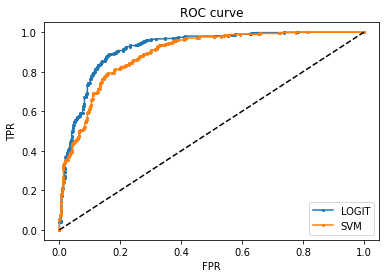

In [16]:
plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
# 면적(0.5~1.0)이 1에 가까울수록-그래프가 좌상단 꼭짓점에 다가갈수록-좋은 모형

In [17]:
# AUC(Area Under the Curve) : ROC curve의 면적
# 1에 가까울수록 좋은 모형
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9202541097672734, 0.8914602826207474)